In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

# Enable GPU memory growth if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("✅ GPU memory growth enabled.")
    except:
        print("⚠️ Could not set GPU memory growth.")
else:
    print("🖥️ Running on CPU.")


✅ GPU memory growth enabled.


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

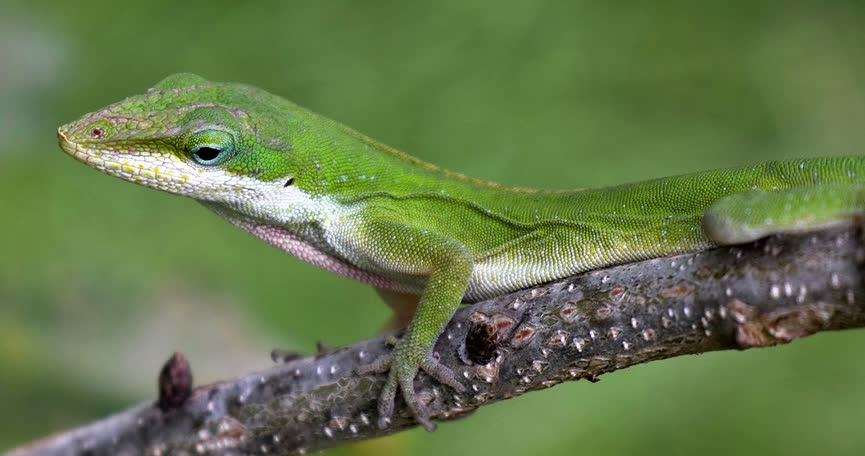

In [5]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200)

In [6]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 4s 4s/step


[[('n01682714', 'American_chameleon', 0.6525439),
  ('n01693334', 'green_lizard', 0.18868294),
  ('n01687978', 'agama', 0.13893886),
  ('n01689811', 'alligator_lizard', 0.013583966),
  ('n01688243', 'frilled_lizard', 0.0043552984)]]

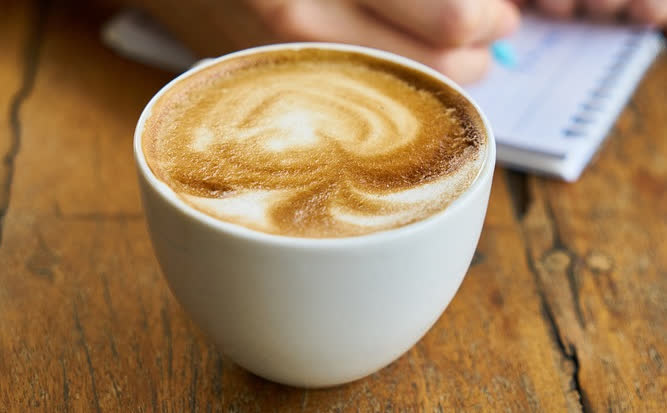

In [7]:
Image(filename='data/MobileNet-samples/2.PNG', width=300,height=200)

In [8]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 16ms/step


[[('n07920052', 'espresso', 0.9767214),
  ('n07930864', 'cup', 0.009970831),
  ('n07932039', 'eggnog', 0.008685831),
  ('n03063599', 'coffee_mug', 0.0036539654),
  ('n04597913', 'wooden_spoon', 0.00048774213)]]

In [9]:
assert results[0][0][1] == 'espresso'

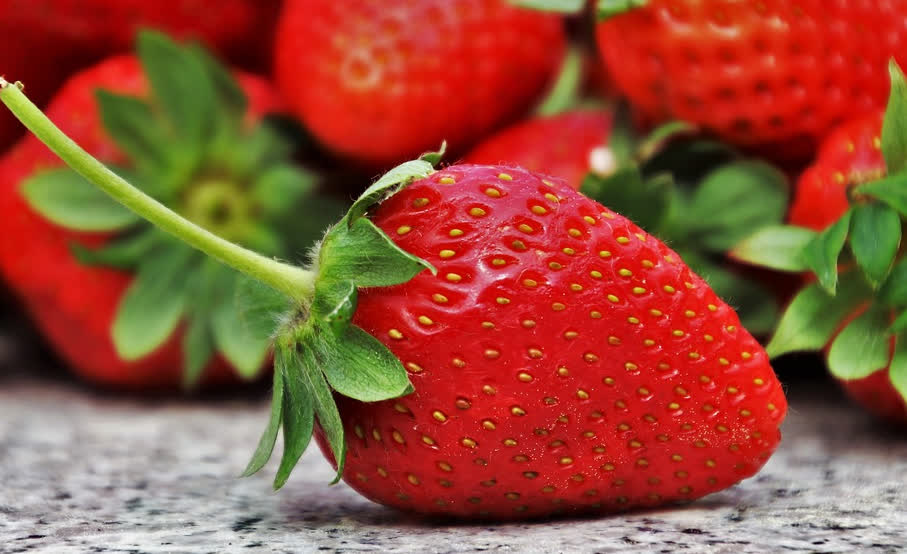

In [10]:
Image(filename='data/MobileNet-samples/3.PNG', width=300,height=200)

In [11]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 13ms/step


[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2543061e-06),
  ('n07747607', 'orange', 8.6556645e-07),
  ('n07753275', 'pineapple', 8.355567e-07),
  ('n07768694', 'pomegranate', 6.254749e-07)]]

In [12]:
assert results[0][0][1] == 'strawberry'

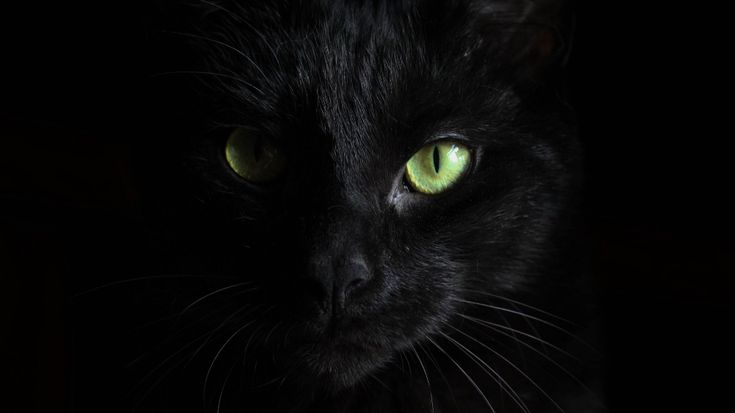

In [13]:
Image(filename='data/MobileNet-samples/4.PNG', width=300,height=200)

In [14]:
preprocessed_image = prepare_image('4.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 14ms/step


[[('n02124075', 'Egyptian_cat', 0.49848405),
  ('n02123597', 'Siamese_cat', 0.26328957),
  ('n02123045', 'tabby', 0.12277333),
  ('n02123159', 'tiger_cat', 0.06041078),
  ('n02123394', 'Persian_cat', 0.01822202)]]

In [16]:
assert results[0][0][1] == 'Egyptian_cat'